Dataset = https://www.kaggle.com/datasets/lucasgreenwell/big5personalitydataset

source .venv/Scripts/activate

In [64]:
import numpy as np
import pylab as pl
import pandas as pd
import matplotlib.pyplot as plt 
import wordcloud
from wordcloud import WordCloud,STOPWORDS
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.utils import shuffle
import matplotlib.ticker as mtick
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

import plotly.express as px
import plotly.graph_objects as go
import colorlover as cl
from plotly.subplots import make_subplots

In [2]:
data_loc = "data-final.csv"
df = pd.read_csv(data_loc, delimiter ='\t')

In [3]:
df

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,dateload,screenw,screenh,introelapse,testelapse,endelapse,IPC,country,lat_appx_lots_of_err,long_appx_lots_of_err
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,...,2016-03-03 02:01:01,768.0,1024.0,9.0,234.0,6,1,GB,51.5448,0.1991
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,...,2016-03-03 02:01:20,1360.0,768.0,12.0,179.0,11,1,MY,3.1698,101.706
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,...,2016-03-03 02:01:56,1366.0,768.0,3.0,186.0,7,1,GB,54.9119,-1.3833
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,...,2016-03-03 02:02:02,1920.0,1200.0,186.0,219.0,7,1,GB,51.75,-1.25
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,...,2016-03-03 02:02:57,1366.0,768.0,8.0,315.0,17,2,KE,1.0,38.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015336,4.0,2.0,4.0,3.0,4.0,3.0,3.0,3.0,3.0,3.0,...,2018-11-08 12:04:58,1920.0,1080.0,3.0,160.0,10,2,US,39.9883,-75.2208
1015337,4.0,3.0,4.0,3.0,3.0,3.0,4.0,4.0,3.0,3.0,...,2018-11-08 12:07:18,1920.0,1080.0,3.0,122.0,7,1,US,38.0,-97.0
1015338,4.0,2.0,4.0,3.0,5.0,1.0,4.0,2.0,4.0,4.0,...,2018-11-08 12:07:49,1920.0,1080.0,2.0,135.0,12,6,US,36.1473,-86.777
1015339,2.0,4.0,3.0,4.0,2.0,2.0,1.0,4.0,2.0,4.0,...,2018-11-08 12:08:34,1920.0,1080.0,6.0,212.0,8,1,US,34.1067,-117.8067


The time spent on each question is also recorded in milliseconds. These are the variables ending in _E. This was calculated by taking the time when the button for the question was clicked minus the time of the most recent other button click.

dateload: The timestamp when the survey was started.

screenw: The width the of user's screen in pixelsThe time spent on each question is also recorded in milliseconds. These are the variables ending in _E. This was calculated by taking the time when the button for the question was clicked minus the time of the most recent other button click.

dateload: The timestamp when the survey was started.

screenw: The width the of user's screen in pixels

screenh: The height of the user's screen in pixels

introelapse: The time in seconds spent on the landing / intro page

testelapse: The time in seconds spent on the page with the survey questions

endelapse: The time in seconds spent on the finalization page (where the user was asked to indicate if they has answered accurately and their answers could be stored and used for research. Again: this dataset only includes users who answered "Yes" to this question, users were free to answer no and could still view their results either way)

IPC: The number of records from the user's IP address in the dataset. For max cleanliness, only use records where this value is 1. High values can be because of shared networks (e.g. entire universities) or multiple submissions

screenh: The height of the user's screen in pixels

introelapse: The time in seconds spent on the landing / intro page

testelapse: The time in seconds spent on the page with the survey questions

endelapse: The time in seconds spent on the finalization page (where the user was asked to indicate if they has answered accurately and their answers could be stored and used for research. Again: this dataset only includes users who answered "Yes" to this question, users were free to answer no and could still view their results either way)

IPC: The number of records from the user's IP address in the dataset. For max cleanliness, only use records where this value is 1. High values can be because of shared networks (e.g. entire universities) or multiple submissions

I am not going to use the second half of the table for now and will trim the df in half. + coutries

In [4]:
df = pd.concat([df.iloc[:, :50], df[["country"]]], axis=1)

In [5]:
df

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,country
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,...,1.0,4.0,1.0,4.0,1.0,5.0,3.0,4.0,5.0,GB
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,...,2.0,4.0,2.0,3.0,1.0,4.0,2.0,5.0,3.0,MY
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,...,1.0,2.0,1.0,4.0,2.0,5.0,3.0,4.0,4.0,GB
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,...,2.0,5.0,2.0,3.0,1.0,4.0,4.0,3.0,3.0,GB
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,...,1.0,5.0,1.0,5.0,1.0,5.0,3.0,5.0,5.0,KE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015336,4.0,2.0,4.0,3.0,4.0,3.0,3.0,3.0,3.0,3.0,...,2.0,4.0,3.0,4.0,2.0,4.0,2.0,2.0,4.0,US
1015337,4.0,3.0,4.0,3.0,3.0,3.0,4.0,4.0,3.0,3.0,...,1.0,5.0,1.0,5.0,1.0,3.0,4.0,5.0,4.0,US
1015338,4.0,2.0,4.0,3.0,5.0,1.0,4.0,2.0,4.0,4.0,...,1.0,5.0,1.0,4.0,1.0,5.0,5.0,4.0,5.0,US
1015339,2.0,4.0,3.0,4.0,2.0,2.0,1.0,4.0,2.0,4.0,...,2.0,4.0,2.0,3.0,2.0,4.0,5.0,5.0,3.0,US


There are a lot of null values, presumable could fill them with averages, but let's assess how significant this is.

In [6]:
print("How many missing values? ", df.isnull().values.sum())
print("No. of coutnries? ", len(df["country"].unique()))
df["country"].unique()

initial_count = len(df)
cleaned_data = df.dropna()
final_count = len(cleaned_data)
print(
    f"Dropped {initial_count - final_count} rows. Remaining participants: {final_count}"
)
df = cleaned_data
del cleaned_data

How many missing values?  89227
No. of coutnries?  224
Dropped 1860 rows. Remaining participants: 1013481


In [9]:
country_counts = df["country"].value_counts()
country_counts

country
US    545912
GB     66487
CA     61805
AU     49753
PH     19844
       ...  
TD         1
NE         1
MF         1
GN         1
SH         1
Name: count, Length: 223, dtype: int64

In [7]:
num_cols = df.columns[:50]
df["zero_flag"] = (df[num_cols] == 0).any(axis=1).astype(int)
zeros_by_country = df.groupby("country")["zero_flag"].sum()
del num_cols

C:\Users\FiercePC\AppData\Local\Temp\ipykernel_37352\1241113121.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["zero_flag"] = (df[num_cols] == 0).any(axis=1).astype(int)


Proportion of 0 values by country

In [10]:
combined = pd.DataFrame(
    {
        "country_count": country_counts,
        "total_zeros": zeros_by_country,
        "percent_null %":  (zeros_by_country / country_counts * 100).astype(int)
    }
)
combined.sort_values(by="percent_null %", ascending=False)

,country_count,total_zeros,percent_null %
country,,,
BQ,2,1,50
BJ,2,1,50
BF,2,1,50
GF,2,1,50
SS,5,2,40
...,...,...,...
TJ,2,0,0
TO,5,0,0
SX,4,0,0


These are the options:
- Change all 0s to 1 or some other number. 
- Make the values null
- Change all 0s to the mean of the value.

I believe turning 0s into nulls would be prefered as I do want to assess the difference between countries. Replacing the values with the mean would diminish the differences between countries.

In [11]:
num_cols = df.columns[:50]
df = pd.concat((df[num_cols].replace(0, np.nan),df["country"]), axis=1)

In [13]:
num_cols = df.columns[:50]
df["zero_flag"] = (df[num_cols] == 0).any(axis=1).astype(int)
df["zero_flag"].unique()
del num_cols 

Q&As Related to Extroversion Personality

These statements are confusing... The statement can either be positive or negative and answers are based on how much you believe in the statement, 1 a little, 5 a lot. While 5 indicates a lot it can reflect the opposite side of the personality trait based on the phrasing of the question. I will review it after this sections.

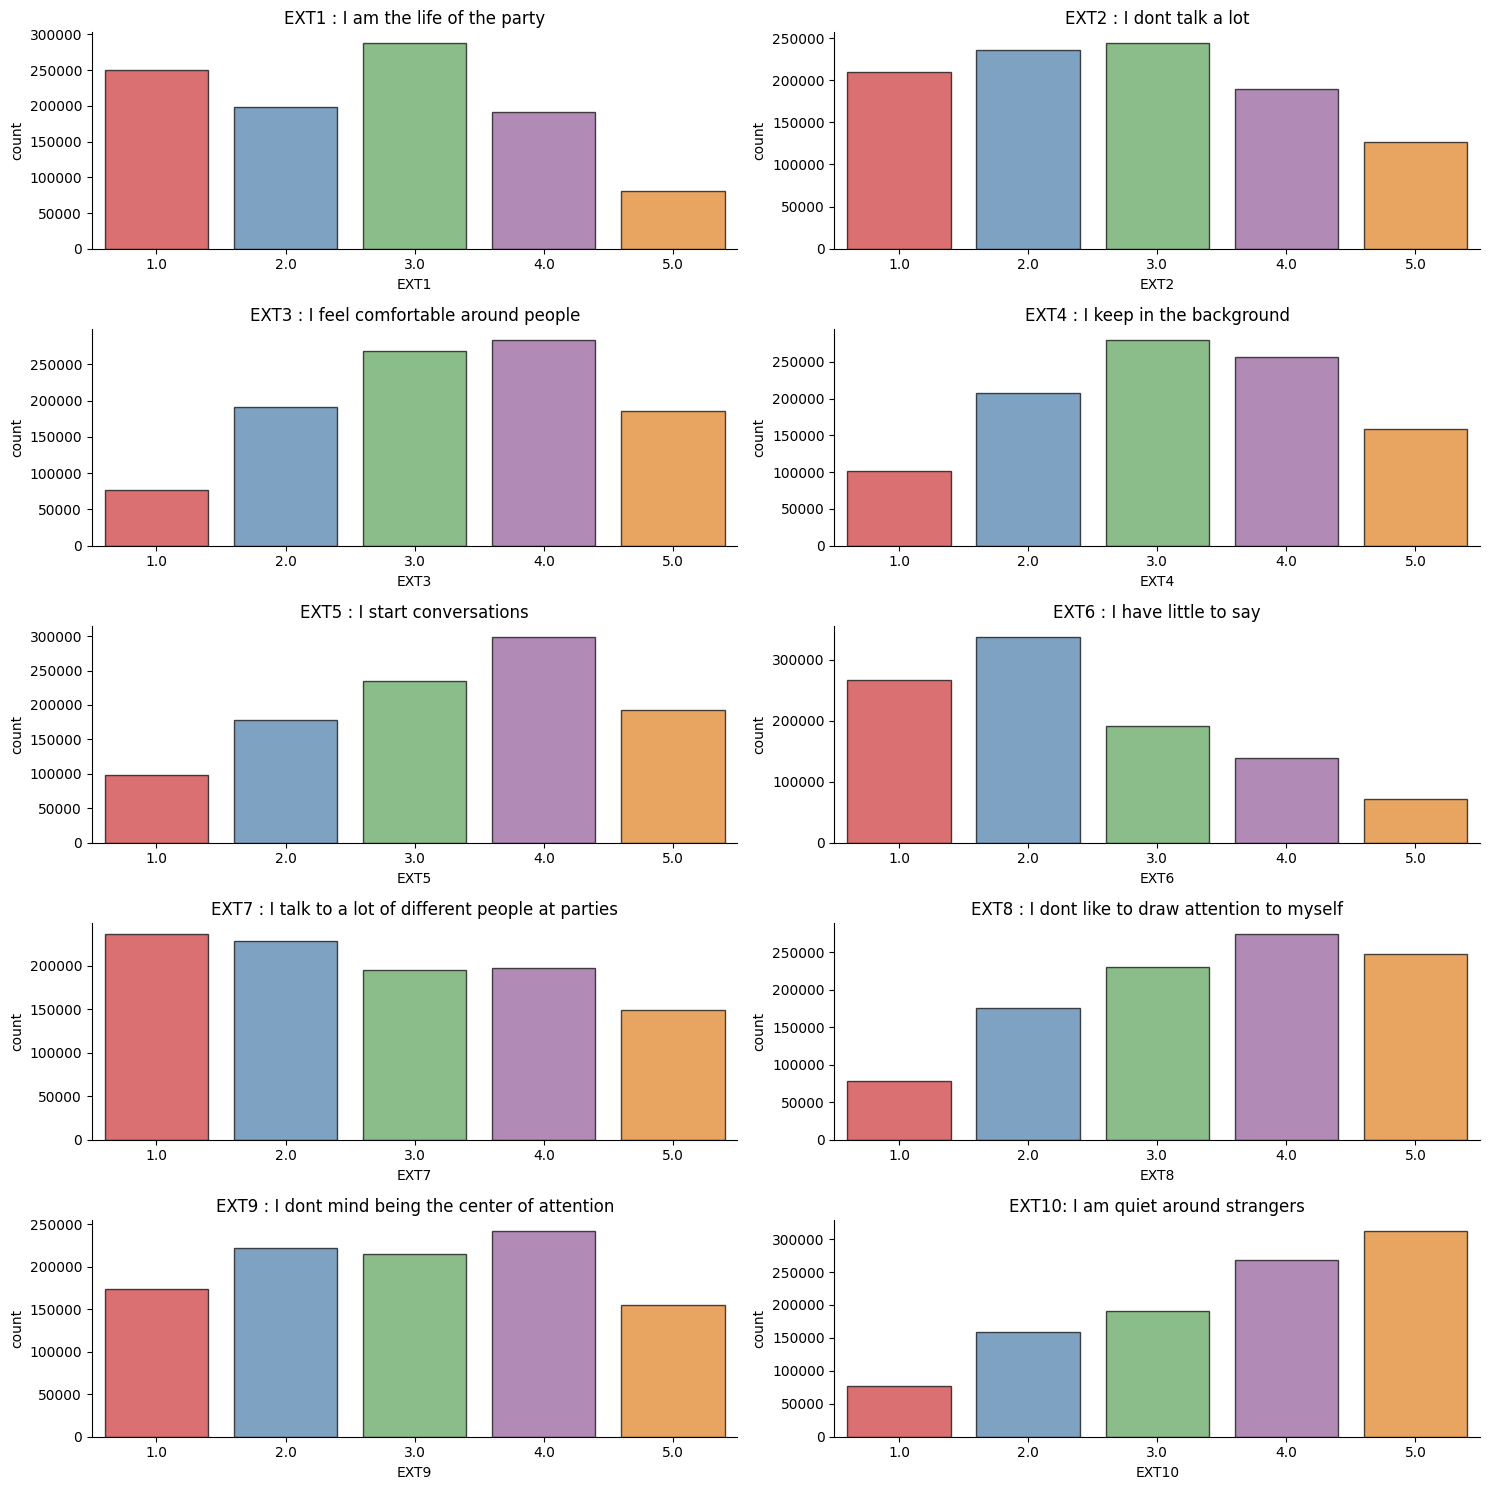

In [ ]:
plt.figure(figsize=[15, 15])
fft = [
    "EXT1",
    "EXT2",
    "EXT3",
    "EXT4",
    "EXT5",
    "EXT6",
    "EXT7",
    "EXT8",
    "EXT9",
    "EXT10",
]

ext_title = ["EXT1 : I am the life of the party",
"EXT2 : I dont talk a lot",
"EXT3 : I feel comfortable around people",
"EXT4 : I keep in the background",
"EXT5 : I start conversations",
"EXT6 : I have little to say",
"EXT7 : I talk to a lot of different people at parties",
"EXT8 : I dont like to draw attention to myself",
"EXT9 : I dont mind being the center of attention",
"EXT10: I am quiet around strangers"]

n = 1

for i, f in enumerate(fft):
    plt.subplot(5, 2, n)
    sns.countplot(x=f, hue=f, edgecolor="black", alpha=0.7, palette="Set1", data=df, legend=False)
    sns.despine()
    plt.title(ext_title[i])
    n = n + 1

plt.tight_layout()
plt.show()

Q&As Related to Neuroticism Personality

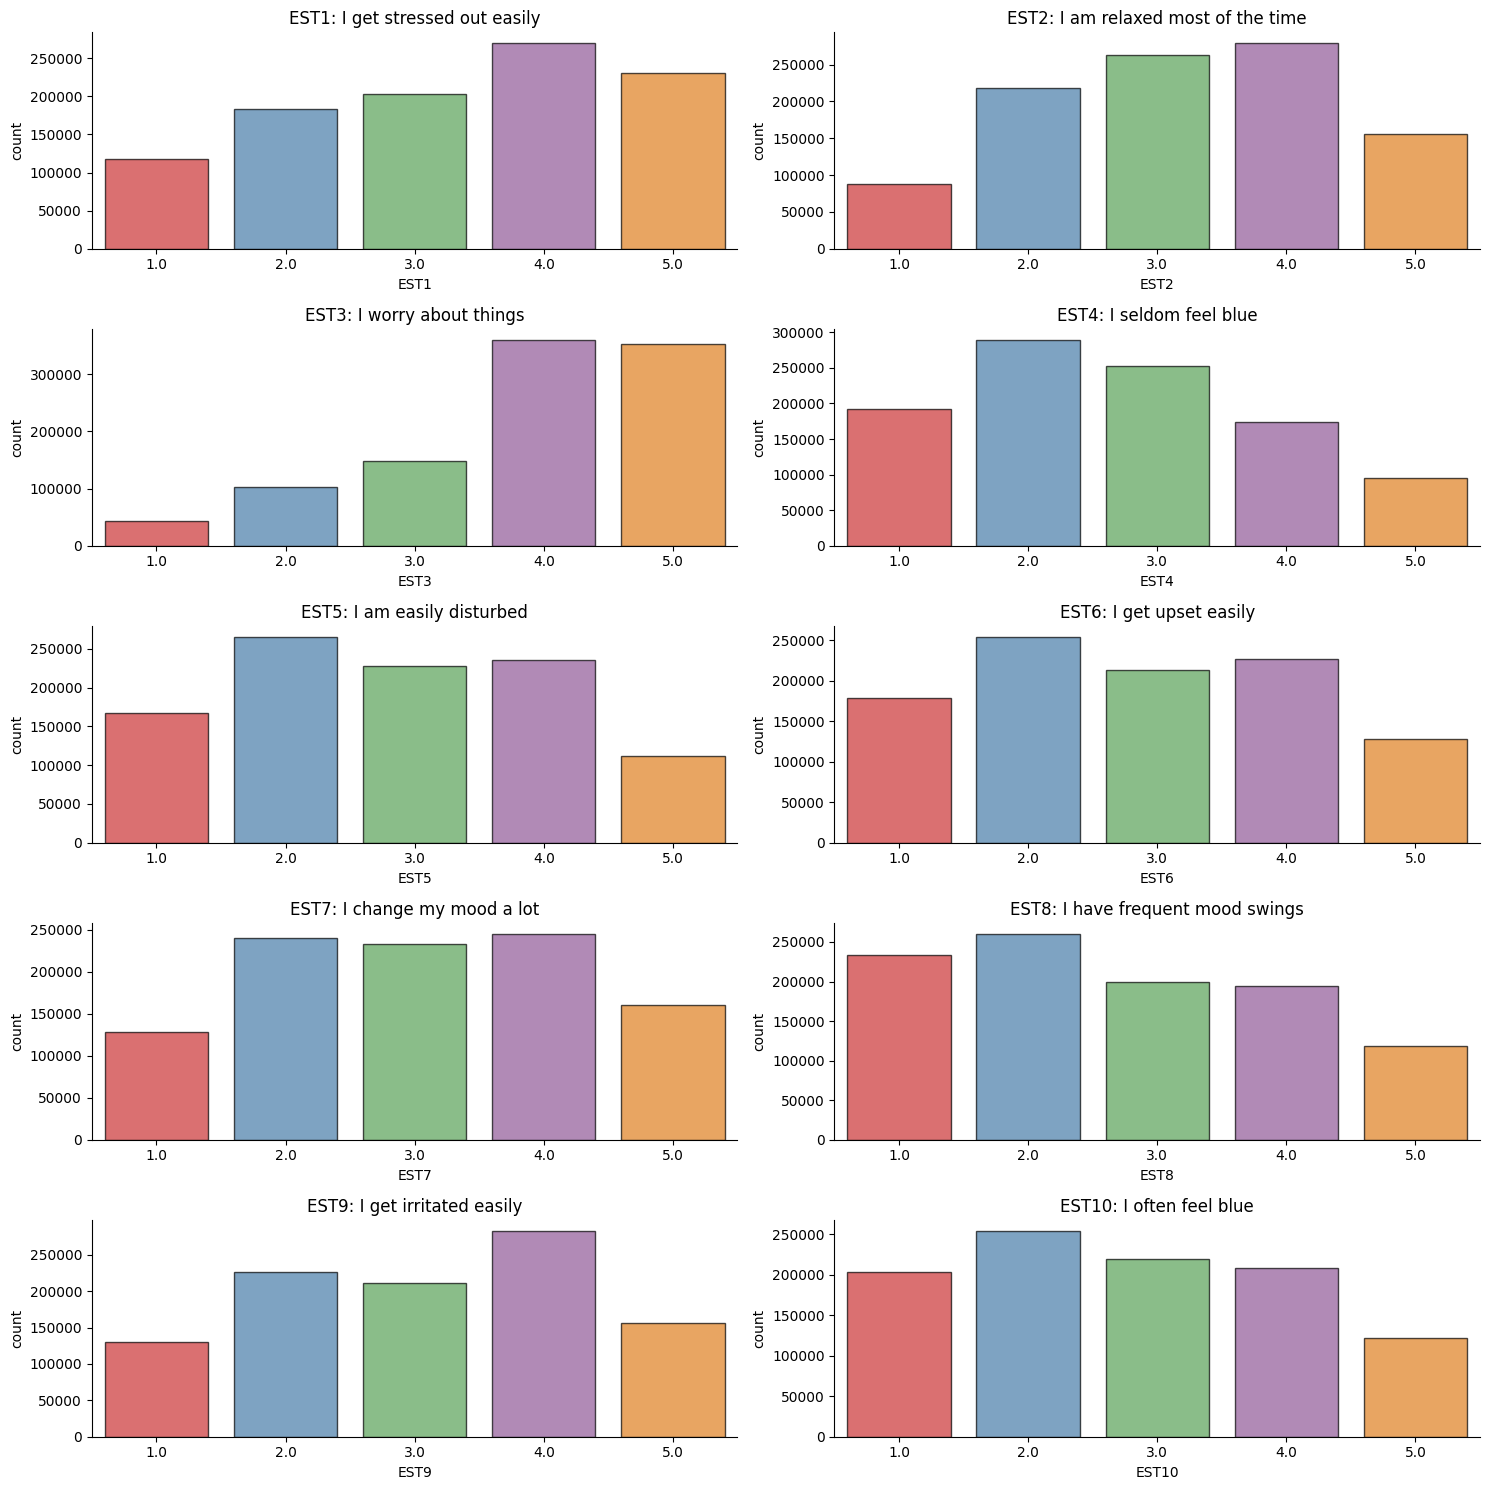

In [ ]:
plt.figure(figsize=[15, 15])

fft = [
    "EST1",
    "EST2",
    "EST3",
    "EST4",
    "EST5",
    "EST6",
    "EST7",
    "EST8",
    "EST9",
    "EST10",
]

nur_titles = [
    "EST1: I get stressed out easily",
    "EST2: I am relaxed most of the time",
    "EST3: I worry about things",
    "EST4: I seldom feel blue",
    "EST5: I am easily disturbed",
    "EST6: I get upset easily",
    "EST7: I change my mood a lot",
    "EST8: I have frequent mood swings",
    "EST9: I get irritated easily",
    "EST10: I often feel blue",
]

for i, f in enumerate(fft):
    plt.subplot(5, 2, i + 1)
    sns.countplot(x=f, hue=f, edgecolor="black", alpha=0.7, palette="Set1", data=df, legend=False)
    sns.despine()
    plt.title(nur_titles[i])

plt.tight_layout()
plt.show()

Q&As Related to Agreeable Personality

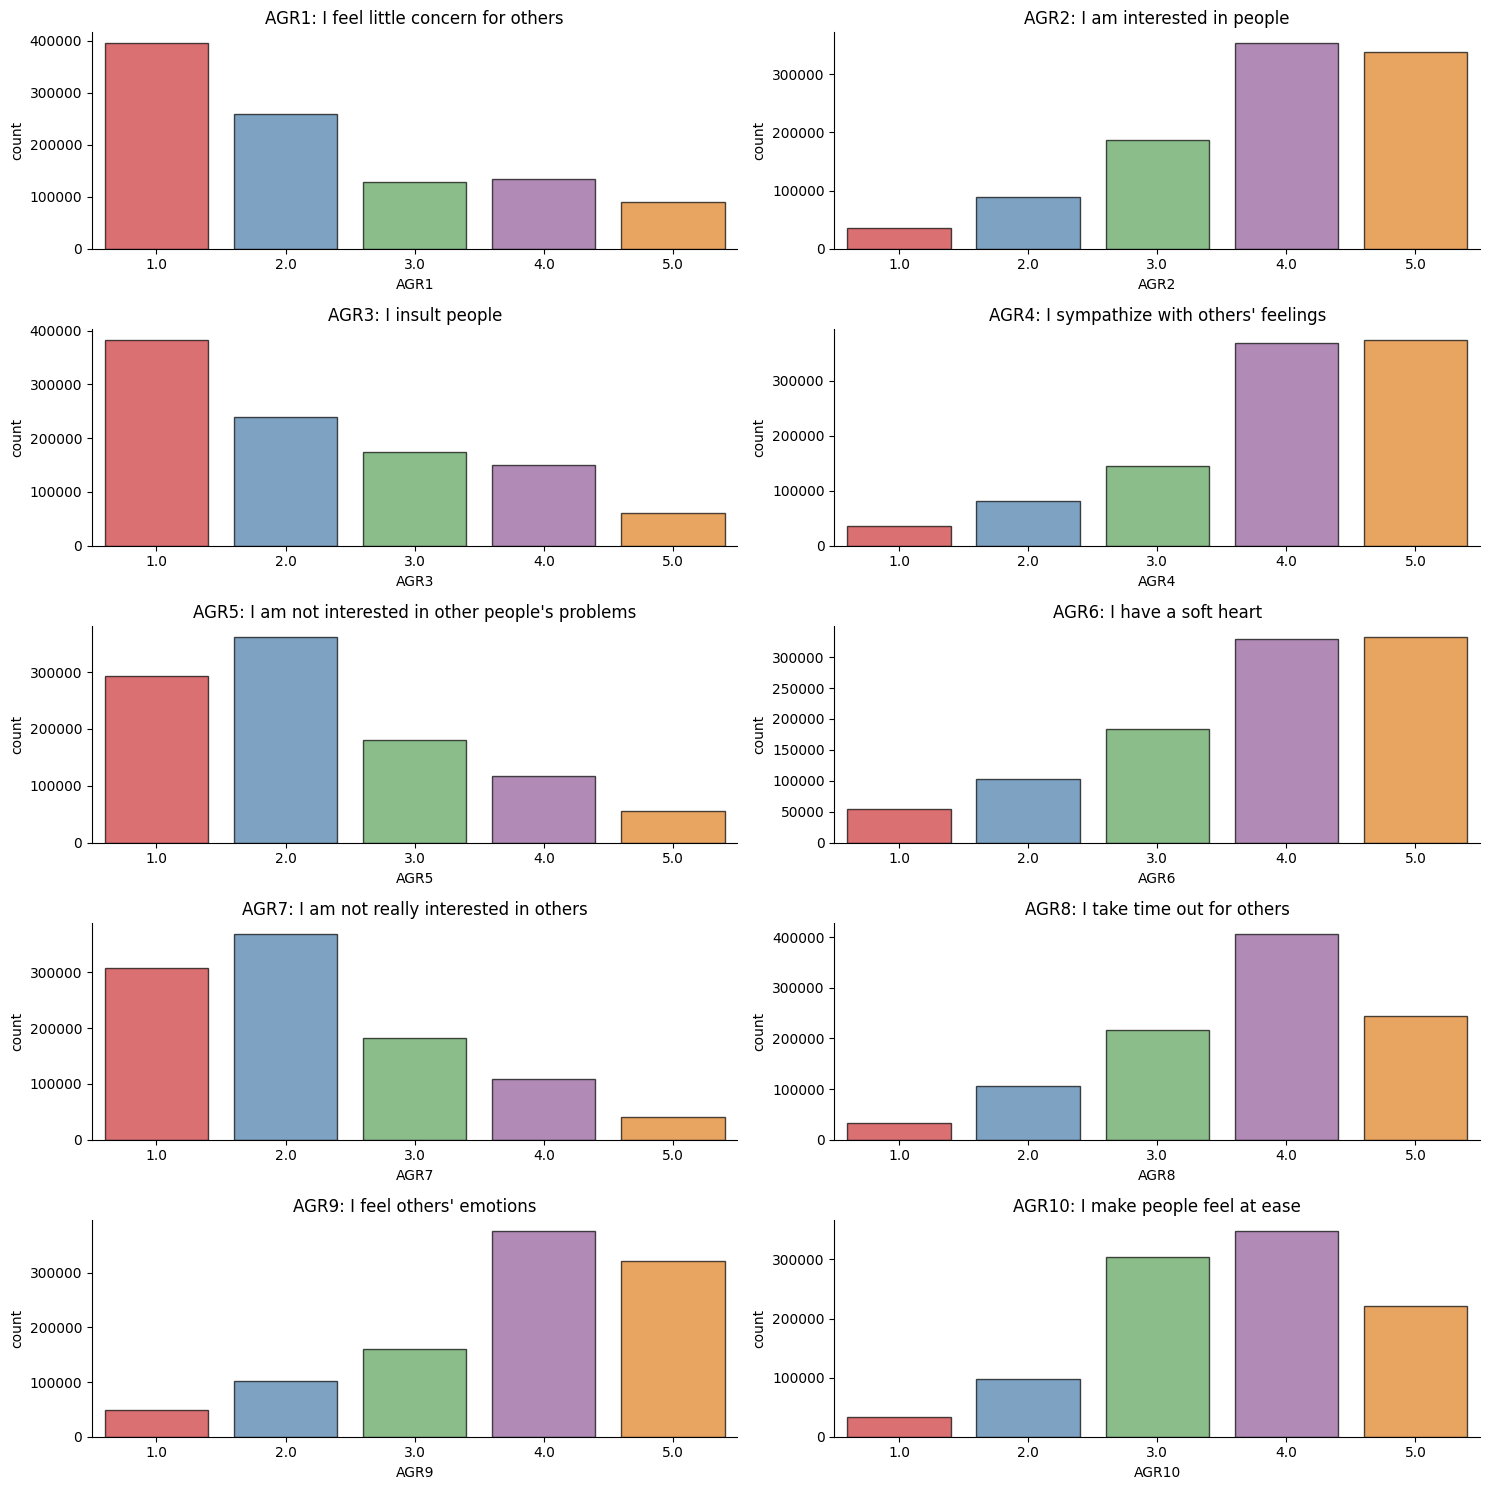

In [ ]:
plt.figure(figsize=[15, 15])

fft = [
    "AGR1",
    "AGR2",
    "AGR3",
    "AGR4",
    "AGR5",
    "AGR6",
    "AGR7",
    "AGR8",
    "AGR9",
    "AGR10",
]

agr_titles = [
    "AGR1: I feel little concern for others",
    "AGR2: I am interested in people",
    "AGR3: I insult people",
    "AGR4: I sympathize with others' feelings",
    "AGR5: I am not interested in other people's problems",
    "AGR6: I have a soft heart",
    "AGR7: I am not really interested in others",
    "AGR8: I take time out for others",
    "AGR9: I feel others' emotions",
    "AGR10: I make people feel at ease",
]

for i, f in enumerate(fft):
    plt.subplot(5, 2, i + 1)
    sns.countplot(x=f, hue=f, edgecolor="black", alpha=0.7, palette="Set1", data=df, legend=False)
    sns.despine()
    plt.title(agr_titles[i])

plt.tight_layout()
plt.show()

Q&As Related to Conscientious Personality

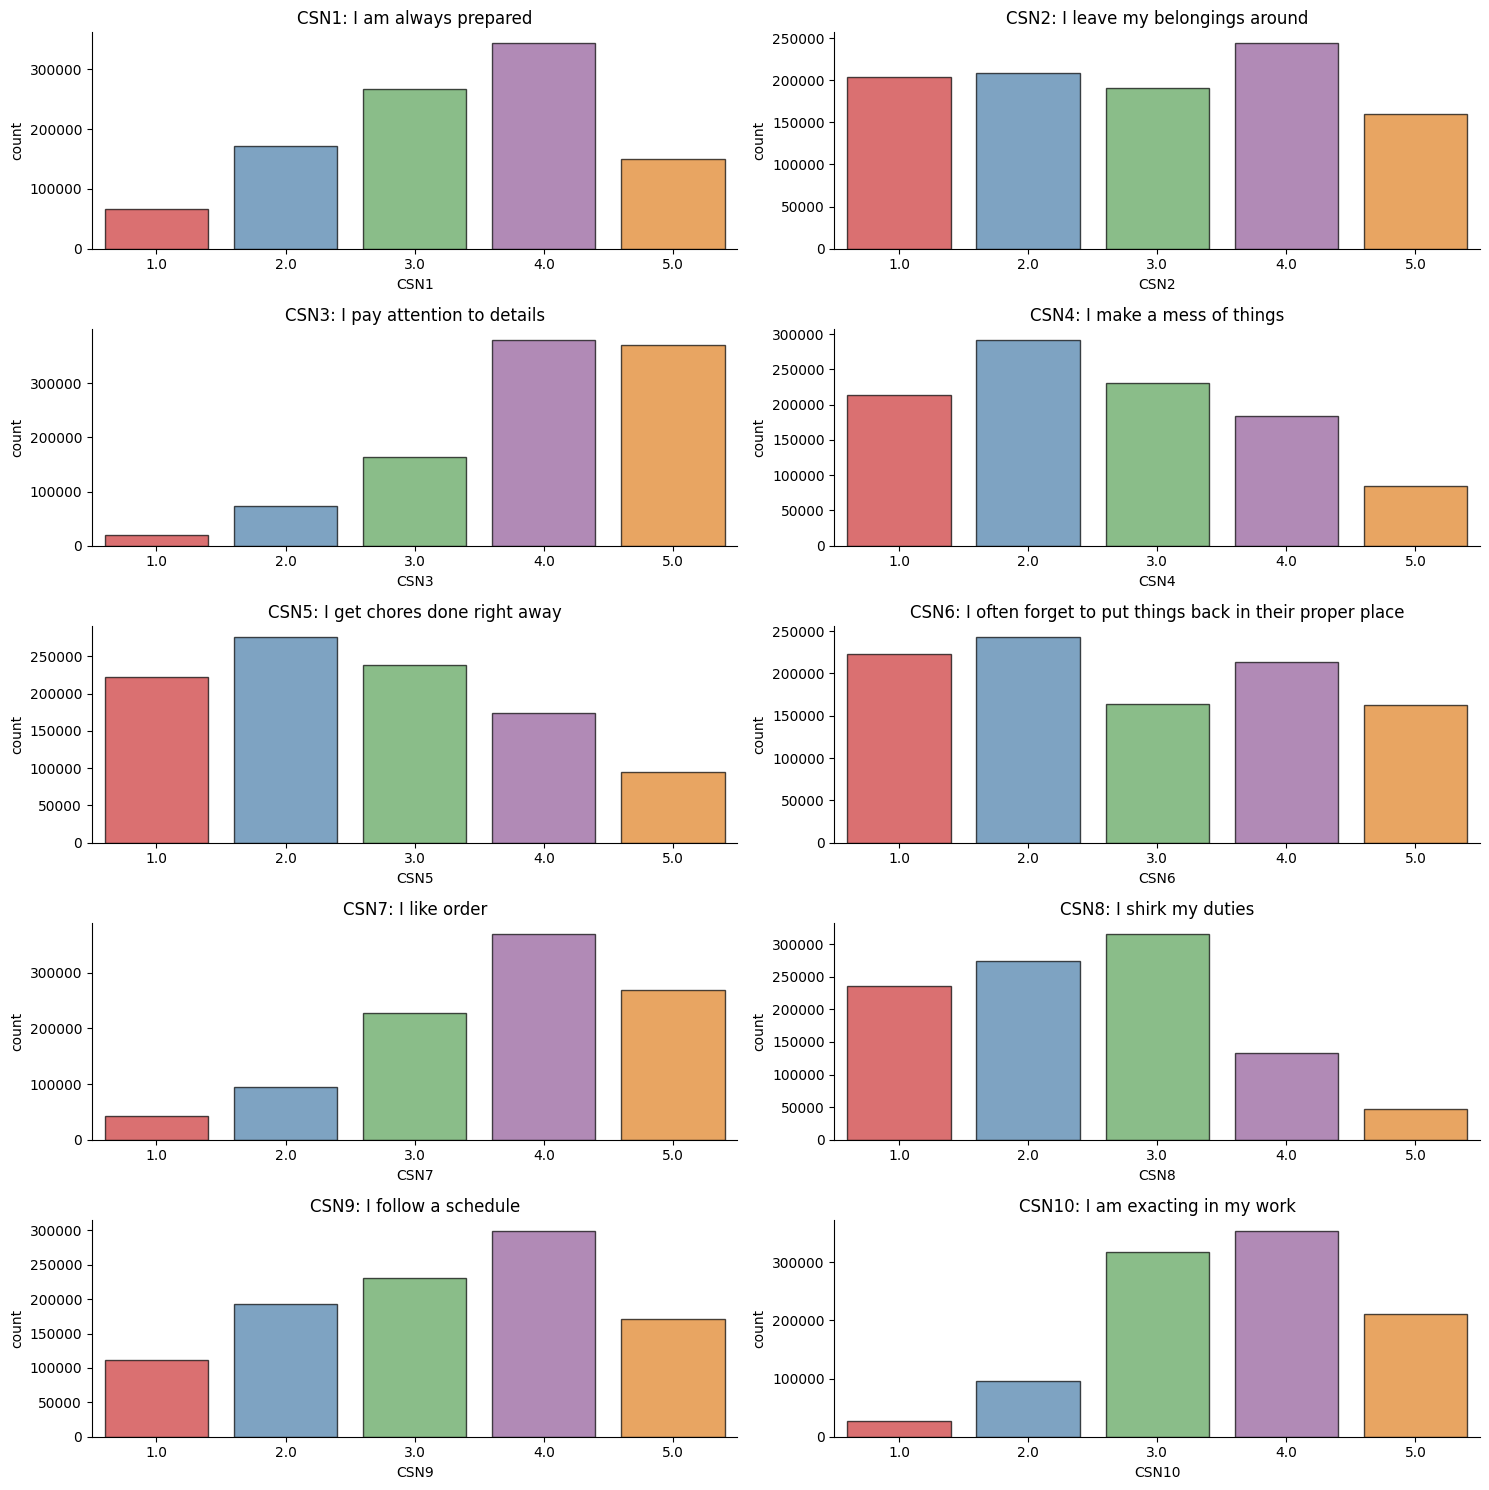

In [ ]:
plt.figure(figsize=[15, 15])

fft = [
    "CSN1",
    "CSN2",
    "CSN3",
    "CSN4",
    "CSN5",
    "CSN6",
    "CSN7",
    "CSN8",
    "CSN9",
    "CSN10",
]

csn_titles = [
    "CSN1: I am always prepared",
    "CSN2: I leave my belongings around",
    "CSN3: I pay attention to details",
    "CSN4: I make a mess of things",
    "CSN5: I get chores done right away",
    "CSN6: I often forget to put things back in their proper place",
    "CSN7: I like order",
    "CSN8: I shirk my duties",
    "CSN9: I follow a schedule",
    "CSN10: I am exacting in my work",
]

for i, f in enumerate(fft):
    plt.subplot(5, 2, i + 1)
    sns.countplot(x=f, hue=f, edgecolor="black", alpha=0.7, palette="Set1", data=df, legend=False)
    sns.despine()
    plt.title(csn_titles[i])

plt.tight_layout()
plt.show()

Q&As Related to Open Personality

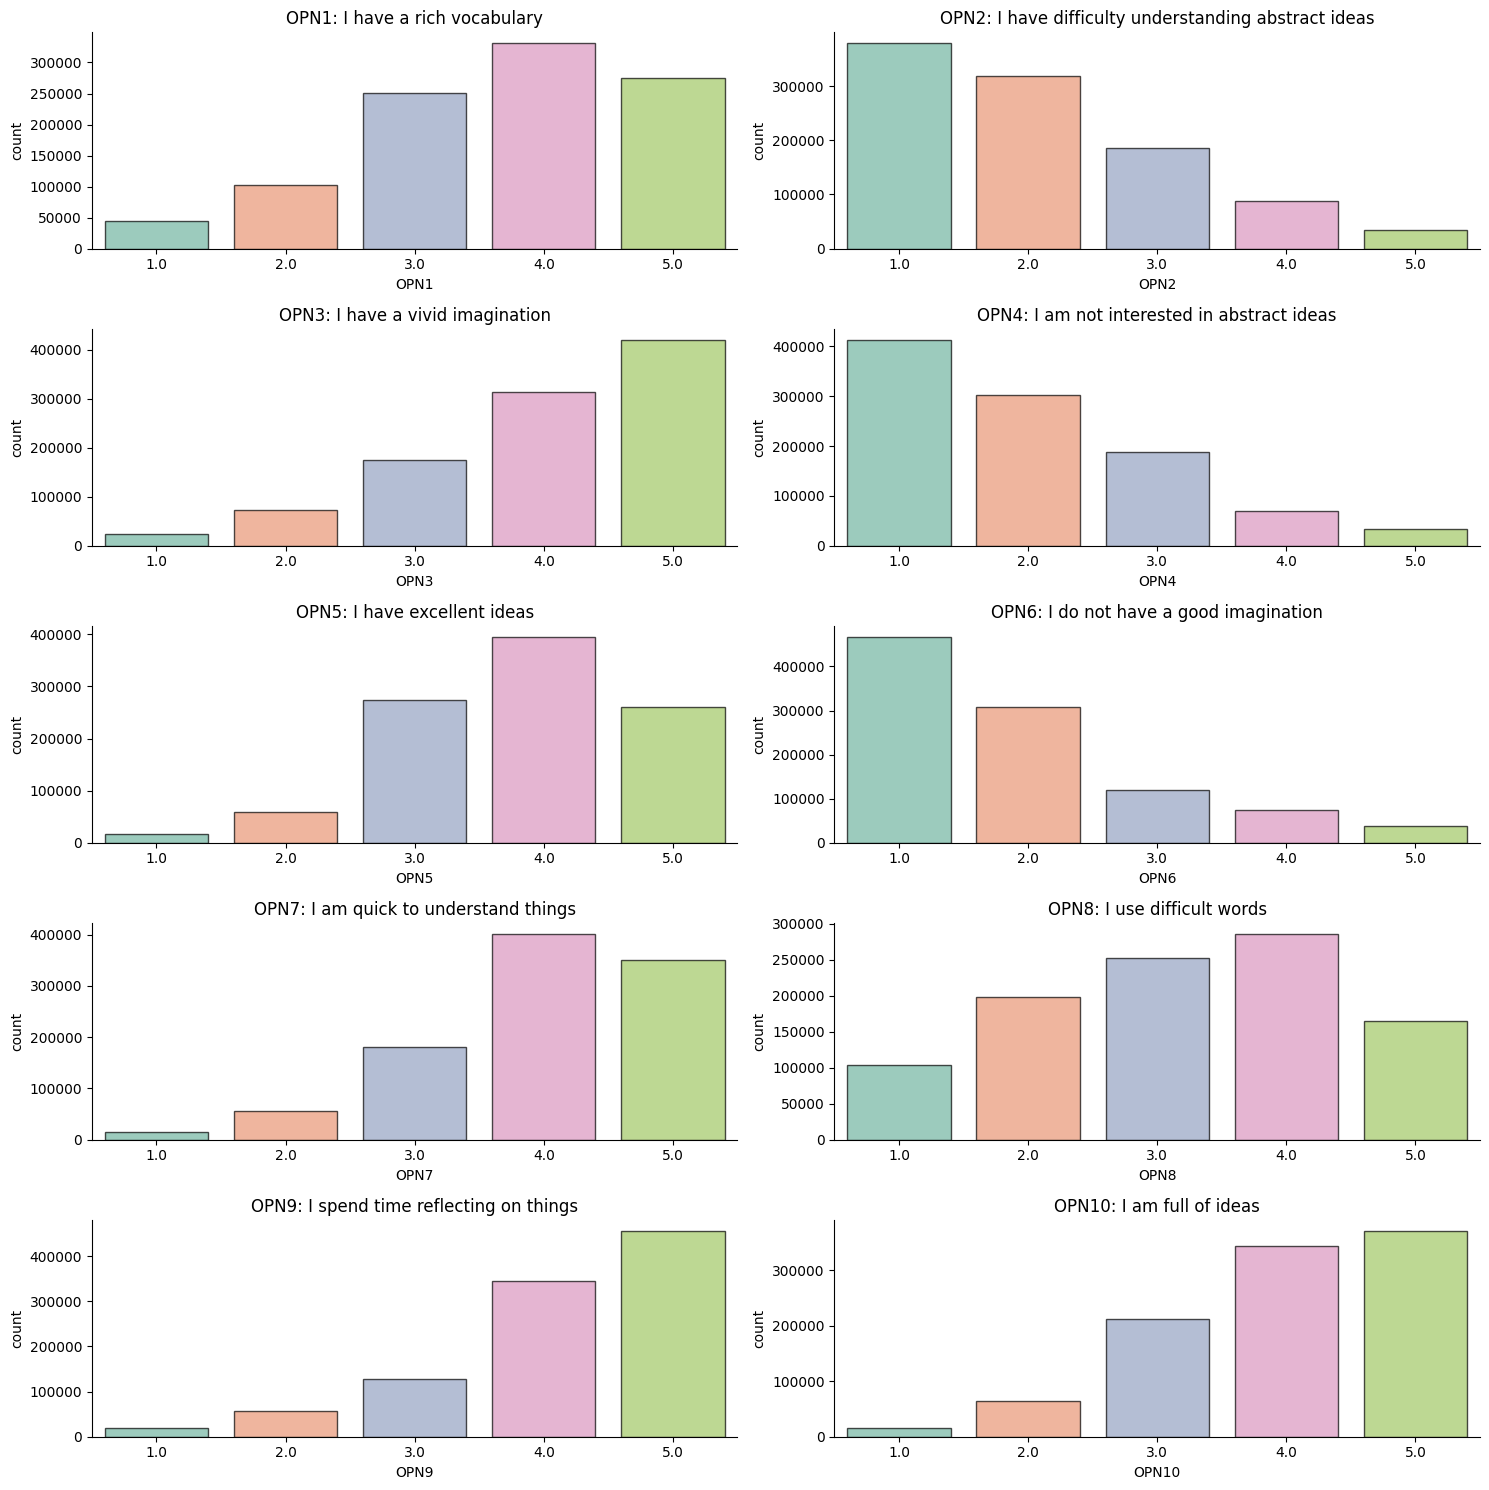

In [ ]:
plt.figure(figsize=[15, 15])

fft = [
    "OPN1",
    "OPN2",
    "OPN3",
    "OPN4",
    "OPN5",
    "OPN6",
    "OPN7",
    "OPN8",
    "OPN9",
    "OPN10",
]

opn_titles = [
    "OPN1: I have a rich vocabulary",
    "OPN2: I have difficulty understanding abstract ideas",
    "OPN3: I have a vivid imagination",
    "OPN4: I am not interested in abstract ideas",
    "OPN5: I have excellent ideas",
    "OPN6: I do not have a good imagination",
    "OPN7: I am quick to understand things",
    "OPN8: I use difficult words",
    "OPN9: I spend time reflecting on things",
    "OPN10: I am full of ideas",
]

for i, f in enumerate(fft):
    plt.subplot(5, 2, i + 1)
    sns.countplot(x=f, hue=f, edgecolor="black", alpha=0.7, palette="Set2", data=df, legend=False)
    sns.despine()
    plt.title(opn_titles[i])

plt.tight_layout()
plt.show()

Questions are either positive or negative for each trait, including verbs that can turn questions into double negative questions.

**EXT**
- EXTROVERTED points: 1 3 5 7 9
- Int points: 2 4 6 8 10
- "EXT1 : I am the life of the party", +
- "EXT2 : I dont talk a lot", -
- "EXT3 : I feel comfortable around people", +
- "EXT4 : I keep in the background", -
- "EXT5 : I start conversations", +
- "EXT6 : I have little to say", -
- "EXT7 : I talk to a lot of different people at parties", +
- "EXT8 : I dont like to draw attention to myself", -
- "EXT9 : I dont mind being the center of attention", +
- "EXT10: I am quiet around strangers" -

**EST**
- Neurotic points: 1 3 5 6 7 8 9 10
- Emotional stability points: 2 4

- 'EST1' : 'I get stressed out easily', +
- 'EST2' : 'I am relaxed most of the time', -
- 'EST3' : 'I worry about things', +
- 'EST4' : 'I seldom feel blue', -
- 'EST5' : 'I am easily disturbed', +
- 'EST6' : 'I get upset easily', +
- 'EST7' : 'I change my mood a lot', +
- 'EST8' : 'I have frequent mood swings',+
- 'EST9' : 'I get irritated easily',+
- 'EST10': 'I often feel blue' +

**AGR**
- AGR points: 1 2 3 4 6 8 9 10
- NON AGR points: 5 7

- 'AGR1' : 'I feel little concern for others', +(person_high_in_agr_would_be_5)
- 'AGR2' : 'I am interested in people', +
- 'AGR3' : 'I insult people', +
- 'AGR4' : 'I sympathize with others feelings', +
- 'AGR5' : 'I am not interested in other peoples problems', -
- 'AGR6' : 'I have a soft heart', +
- 'AGR7' : 'I am not really interested in others', -
- 'AGR8' : 'I take time out for others', +
- 'AGR9' : 'I feel others emotions', +
- 'AGR10': 'I make people feel at ease' +

**CSN**
- Positive points: 1 3 5 7 9 10
- Negative points: 2 4 6 8

- "CSN1: I am always prepared", +
- "CSN2: I leave my belongings around", -
- "CSN3: I pay attention to details", +
- "CSN4: I make a mess of things", -
- "CSN5: I get chores done right away", +
- "CSN6: I often forget to put things back in their proper place", +- so -
- "CSN7: I like order", +
- "CSN8: I shirk my duties", -
- "CSN9: I follow a schedule", +
- "CSN10: I am exacting in my work" +

**OPN**
- Positive points: 1 3 5 6 7 8 9 10
- Negative points: 2 4

- 'OPN1' : 'I have a rich vocabulary', +
- 'OPN2' : 'I have difficulty understanding abstract ideas', -
- 'OPN3' : 'I have a vivid imagination', +
- 'OPN4' : 'I am not interested in abstract ideas', -
- 'OPN5' : 'I have excellent ideas', +
- 'OPN6' : 'I do not have a good imagination', -
- 'OPN7' : 'I am quick to understand things', +
- 'OPN8' : 'I use difficult words', +
- 'OPN9' : 'I spend time reflecting on things', +
- 'OPN10': 'I am full of ideas +

For continuity, I will make all positive points end on a 5 and negative points end on a 1.

In [14]:
# # EXT
# # Positive points: 1 3 5 7 9
# # Negative points: 2 4 6 8 10

new_number = {1: 5, 2: 4, 4: 2, 5: 1}

df["EXT2"] = df["EXT2"].replace(new_number)
df["EXT4"] = df["EXT4"].replace(new_number)
df["EXT6"] = df["EXT6"].replace(new_number)
df["EXT8"] = df["EXT8"].replace(new_number)
df["EXT10"] = df["EXT10"].replace(new_number)

# # EST
# # - Positive points: 1 3 5 6 7 8 9 10
# # - Negative points: 2 4

df["EST2"] = df["EST2"].replace(new_number)
df["EST4"] = df["EST4"].replace(new_number)

# # AGR
# # - Positive points: 2 4 6 8 9 10
# # - Negative points: 1 3 5 7


df["AGR5"] = df["AGR5"].replace(new_number)
df["AGR7"] = df["AGR7"].replace(new_number)

# # CSN
# # - Positive points: 1 3 5 7 9 10
# # - Negative points: 2 4 6 8

df["CSN2"] = df["CSN2"].replace(new_number)
df["CSN4"] = df["CSN4"].replace(new_number)
df["CSN6"] = df["CSN6"].replace(new_number)
df["CSN8"] = df["CSN8"].replace(new_number)


# # OPN
# # - Positive points: 1 3 5 6 7 8 9 10
# # - Negative points: 2 4

df["OPN2"] = df["OPN2"].replace(new_number)
df["OPN4"] = df["OPN4"].replace(new_number)

In [15]:
continents = pd.read_csv("continents2.csv")
continents

,name,alpha-2,alpha-3,country-code,iso_3166-2,region,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,NaN,142.0,34.0,NaN
1,Åland Islands,AX,ALA,248,ISO 3166-2:AX,Europe,Northern Europe,NaN,150.0,154.0,NaN
2,Albania,AL,ALB,8,ISO 3166-2:AL,Europe,Southern Europe,NaN,150.0,39.0,NaN
3,Algeria,DZ,DZA,12,ISO 3166-2:DZ,Africa,Northern Africa,NaN,2.0,15.0,NaN
4,American Samoa,AS,ASM,16,ISO 3166-2:AS,Oceania,Polynesia,NaN,9.0,61.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
244,Wallis and Futuna,WF,WLF,876,ISO 3166-2:WF,Oceania,Polynesia,NaN,9.0,61.0,NaN
245,Western Sahara,EH,ESH,732,ISO 3166-2:EH,Africa,Northern Africa,NaN,2.0,15.0,NaN
246,Yemen,YE,YEM,887,ISO 3166-2:YE,Asia,Western Asia,NaN,142.0,145.0,NaN
247,Zambia,ZM,ZMB,894,ISO 3166-2:ZM,Africa,Sub-Saharan Africa,Eastern Africa,2.0,202.0,14.0


In [19]:
df = df.drop(columns=["zero_flag"])

In [17]:
df = df.merge(
    continents[["alpha-2", "region"]], 
    left_on="country",  
    right_on="alpha-2",  
    how="left", 
)

Gather average for question groups

In [29]:
EXT_lst = ["EXT1","EXT2","EXT3","EXT4","EXT5","EXT6","EXT7","EXT8","EXT9","EXT10"]
EST_lst = ["EST1","EST2","EST3","EST4","EST5","EST6","EST7","EST8","EST9","EST10"]
AGR_lst = ["AGR1","AGR2","AGR3","AGR4","AGR5","AGR6","AGR7","AGR8","AGR9","AGR10"]
CSN_lst = ["CSN1","CSN2","CSN3","CSN4","CSN5","CSN6","CSN7","CSN8","CSN9","CSN10"]
OPN_lst = ["OPN1","OPN2","OPN3","OPN4","OPN5","OPN6","OPN7","OPN8","OPN9","OPN10"]


df["EXT_A"] = df[EXT_lst].mean(axis=1)
df["EST_A"] = df[EST_lst].mean(axis=1)
df["AGR_A"] = df[AGR_lst].mean(axis=1)
df["CSN_A"] = df[CSN_lst].mean(axis=1)
df["OPN_A"] = df[OPN_lst].mean(axis=1)


In [30]:
df

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN9,OPN10,country,alpha-2,region,EXT_A,EST_A,AGR_A,CSN_A,OPN_A
0,4.0,5.0,5.0,4.0,5.0,5.0,5.0,4.0,4.0,5.0,...,4.0,5.0,GB,GB,Europe,4.6,2.4,3.5,3.2,4.1
1,3.0,1.0,3.0,2.0,3.0,3.0,2.0,1.0,1.0,1.0,...,5.0,3.0,MY,MY,Asia,2.0,2.5,3.6,3.7,3.1
2,2.0,3.0,4.0,2.0,3.0,4.0,1.0,3.0,2.0,1.0,...,4.0,4.0,GB,GB,Europe,2.5,2.6,3.4,3.4,3.9
3,2.0,4.0,2.0,3.0,4.0,4.0,2.0,2.0,1.0,2.0,...,3.0,3.0,GB,GB,Europe,2.6,2.9,3.6,2.5,3.5
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,1.0,3.0,2.0,...,5.0,5.0,KE,KE,Africa,2.9,1.9,3.8,4.8,4.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1013476,4.0,4.0,4.0,3.0,4.0,3.0,3.0,3.0,3.0,3.0,...,2.0,4.0,US,US,Americas,3.4,3.3,4.0,3.1,3.1
1013477,4.0,3.0,4.0,3.0,3.0,3.0,4.0,2.0,3.0,3.0,...,5.0,4.0,US,US,Americas,3.2,4.4,3.3,2.8,4.1
1013478,4.0,4.0,4.0,3.0,5.0,5.0,4.0,4.0,4.0,2.0,...,4.0,5.0,US,US,Americas,3.9,2.9,3.9,1.9,4.4
1013479,2.0,2.0,3.0,2.0,2.0,4.0,1.0,2.0,2.0,2.0,...,5.0,3.0,US,US,Americas,2.2,3.5,3.3,3.8,3.9


In [31]:
trait_avgs = df.groupby("region")[
    ["EXT_A", "EST_A", "AGR_A", "CSN_A", "OPN_A"]
].mean()

trait_avgs = trait_avgs.loc[
    ["Africa", "Americas", "Asia", "Europe", "Oceania"], :
]

trait_avgs = trait_avgs.T

trait_avgs["World"] = trait_avgs.mean(axis=1)

trait_avgs = trait_avgs.sort_values(by="World", ascending=True)

trait_avgs["Min"] = trait_avgs.min(axis=1)
trait_avgs["Max"] = trait_avgs.max(axis=1)

In [ ]:
from tabulate import tabulate

table = tabulate(trait_avgs.round(2), headers="keys", tablefmt="fancy_grid")

print(table)

╒═══════╤══════════╤════════════╤════════╤══════════╤═══════════╤═════════╤═══════╤═══════╕
│       │   Africa │   Americas │   Asia │   Europe │   Oceania │   World │   Min │   Max │
╞═══════╪══════════╪════════════╪════════╪══════════╪═══════════╪═════════╪═══════╪═══════╡
│ EXT_A │     2.86 │       2.98 │   2.91 │     2.96 │      3.01 │    2.94 │  2.86 │  3.01 │
├───────┼──────────┼────────────┼────────┼──────────┼───────────┼─────────┼───────┼───────┤
│ EST_A │     3.05 │       3.05 │   3.15 │     3.11 │      3.04 │    3.08 │  3.04 │  3.15 │
├───────┼──────────┼────────────┼────────┼──────────┼───────────┼─────────┼───────┼───────┤
│ CSN_A │     3.49 │       3.4  │   3.35 │     3.25 │      3.35 │    3.37 │  3.25 │  3.49 │
├───────┼──────────┼────────────┼────────┼──────────┼───────────┼─────────┼───────┼───────┤
│ AGR_A │     3.49 │       3.49 │   3.5  │     3.42 │      3.49 │    3.48 │  3.42 │  3.5  │
├───────┼──────────┼────────────┼────────┼──────────┼───────────┼─────────┼─────

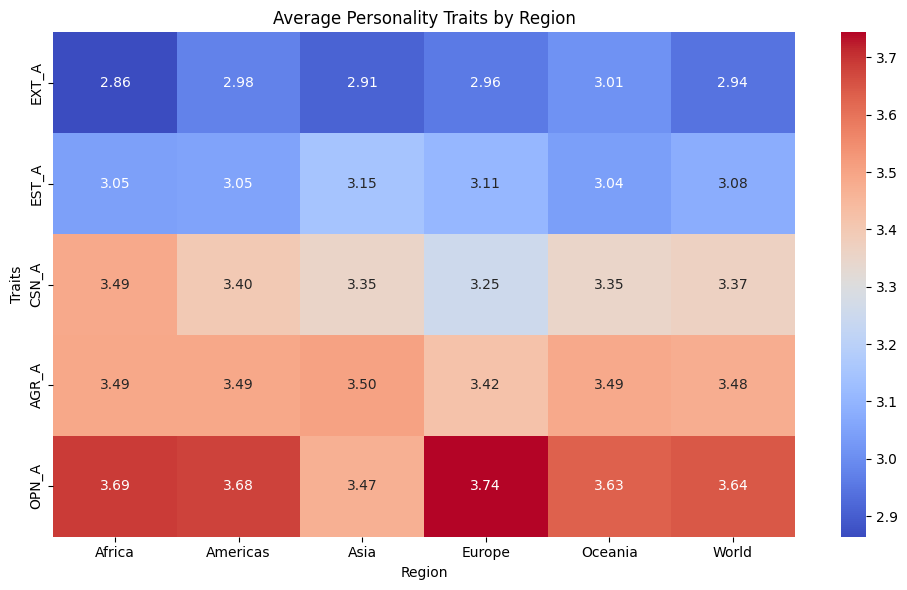

In [43]:
heatmap_data = trait_avgs.drop(columns=["Min", "Max"])

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)

plt.title("Average Personality Traits by Region")
plt.ylabel("Traits")
plt.xlabel("Region")
plt.tight_layout()
plt.show()

In [47]:
df = df.iloc[:, :50]
df

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
0,4.0,5.0,5.0,4.0,5.0,5.0,5.0,4.0,4.0,5.0,...,5.0,5.0,4.0,5.0,4.0,1.0,5.0,3.0,4.0,5.0
1,3.0,1.0,3.0,2.0,3.0,3.0,2.0,1.0,1.0,1.0,...,1.0,4.0,4.0,4.0,3.0,1.0,4.0,2.0,5.0,3.0
2,2.0,3.0,4.0,2.0,3.0,4.0,1.0,3.0,2.0,1.0,...,5.0,5.0,2.0,5.0,4.0,2.0,5.0,3.0,4.0,4.0
3,2.0,4.0,2.0,3.0,4.0,4.0,2.0,2.0,1.0,2.0,...,4.0,4.0,5.0,4.0,3.0,1.0,4.0,4.0,3.0,3.0
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,1.0,3.0,2.0,...,5.0,5.0,5.0,5.0,5.0,1.0,5.0,3.0,5.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1013476,4.0,4.0,4.0,3.0,4.0,3.0,3.0,3.0,3.0,3.0,...,2.0,4.0,4.0,3.0,4.0,2.0,4.0,2.0,2.0,4.0
1013477,4.0,3.0,4.0,3.0,3.0,3.0,4.0,2.0,3.0,3.0,...,4.0,5.0,5.0,5.0,5.0,1.0,3.0,4.0,5.0,4.0
1013478,4.0,4.0,4.0,3.0,5.0,5.0,4.0,4.0,4.0,2.0,...,5.0,5.0,5.0,5.0,4.0,1.0,5.0,5.0,4.0,5.0
1013479,2.0,2.0,3.0,2.0,2.0,4.0,1.0,2.0,2.0,2.0,...,5.0,4.0,4.0,4.0,3.0,2.0,4.0,5.0,5.0,3.0


In [ ]:
df = df.dropna()

kmeans = KMeans(n_clusters=5)
k_fit = kmeans.fit(df)

In [56]:
predictions = k_fit.labels_
df["Clusters"] = predictions
df

C:\Users\FiercePC\AppData\Local\Temp\ipykernel_37352\3448507756.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Clusters"] = predictions


,EXT1,EXT2,EXT3,EXT4,EXT5,...,OPN7,OPN8,OPN9,OPN10,Clusters
0,4.0,5.0,5.0,4.0,5.0,...,5.0,3.0,4.0,5.0,0
1,3.0,1.0,3.0,2.0,3.0,...,4.0,2.0,5.0,3.0,1
2,2.0,3.0,4.0,2.0,3.0,...,5.0,3.0,4.0,4.0,1
3,2.0,4.0,2.0,3.0,4.0,...,4.0,4.0,3.0,3.0,3
4,3.0,3.0,3.0,3.0,5.0,...,5.0,3.0,5.0,5.0,0
...,...,...,...,...,...,...,...,...,...,...,...
1013476,4.0,4.0,4.0,3.0,4.0,...,4.0,2.0,2.0,4.0,4
1013477,4.0,3.0,4.0,3.0,3.0,...,3.0,4.0,5.0,4.0,4
1013478,4.0,4.0,4.0,3.0,5.0,...,5.0,5.0,4.0,5.0,4
1013479,2.0,2.0,3.0,2.0,2.0,...,4.0,5.0,5.0,3.0,1


In [55]:
df.Clusters.value_counts()

Clusters
4    192776
0    183266
1    180287
2    169142
3    148895
Name: count, dtype: int64

In [59]:
pd.options.display.max_columns = 150
df.groupby("Clusters").mean().round(2)

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
Clusters,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,3.46,4.04,4.33,3.76,4.27,4.32,3.87,3.18,3.74,3.47,2.32,2.15,3.15,2.68,2.11,1.90,2.10,1.67,2.11,1.72,1.89,4.45,1.84,4.25,4.13,3.86,4.40,4.10,4.09,4.20,3.75,3.42,4.20,4.10,3.14,3.73,3.88,4.06,3.59,3.89,3.91,4.25,4.09,4.21,4.16,1.66,4.33,3.25,4.11,4.29
1,2.15,2.73,3.11,2.36,3.00,3.31,2.24,2.01,2.33,1.88,3.60,2.97,4.21,3.41,2.88,2.88,2.94,2.50,3.04,2.76,1.85,3.98,1.69,4.39,4.04,4.20,4.01,4.01,4.20,3.73,3.86,3.79,4.30,3.97,3.26,3.94,4.19,3.98,3.86,3.90,3.56,3.83,3.89,3.92,3.71,1.99,4.00,2.97,4.27,3.79
2,1.80,2.36,2.23,1.94,2.29,2.81,1.74,1.92,2.18,1.51,4.28,3.54,4.52,3.87,3.57,3.89,4.00,3.78,4.01,3.96,2.47,3.37,2.60,3.83,3.43,3.86,3.28,3.43,3.66,3.05,2.81,2.61,3.81,2.49,2.07,2.48,3.56,2.93,2.76,3.31,3.52,3.62,4.07,3.87,3.43,2.09,3.69,3.19,4.29,3.72
3,2.15,2.55,2.82,2.41,2.62,3.13,2.12,2.28,2.69,2.01,2.42,2.26,3.12,2.99,2.38,2.08,2.37,1.98,2.67,2.36,3.05,3.03,2.63,2.91,2.76,2.79,2.90,2.98,2.73,3.09,3.29,3.09,3.84,3.54,2.45,3.19,3.56,3.43,2.90,3.52,3.73,4.05,3.79,3.95,3.79,2.05,4.09,3.30,3.92,3.84
4,3.46,4.09,3.81,3.51,4.06,4.18,3.67,3.24,3.79,3.01,3.81,3.04,4.24,3.58,3.27,3.47,3.80,3.45,3.64,3.18,2.14,4.30,2.66,4.19,4.00,4.01,4.15,3.91,4.13,3.86,2.97,2.36,3.85,2.75,2.21,2.46,3.46,3.16,2.93,3.49,3.79,3.90,4.27,4.05,3.98,1.76,4.00,3.40,4.21,4.22


In [62]:
col_list = list(df)
ext = col_list[0:10]
est = col_list[10:20]
agr = col_list[20:30]
csn = col_list[30:40]
opn = col_list[40:50]

data_sums = pd.DataFrame()
data_sums["extroversion"] = df[ext].sum(axis=1) / 10
data_sums["neurotic"] = df[est].sum(axis=1) / 10
data_sums["agreeable"] = df[agr].sum(axis=1) / 10
data_sums["conscientious"] = df[csn].sum(axis=1) / 10
data_sums["open"] = df[opn].sum(axis=1) / 10
data_sums["clusters"] = predictions
data_sums.groupby("clusters").mean().round(2)

,extroversion,neurotic,agreeable,conscientious,open
clusters,,,,,
0,3.85,2.19,3.72,3.78,3.83
1,2.51,3.12,3.61,3.90,3.59
2,2.08,3.94,3.30,2.88,3.55
3,2.48,2.46,2.89,3.28,3.65
4,3.68,3.55,3.73,2.96,3.76


In [67]:
pca = PCA(n_components=2)
pca_fit = pca.fit_transform(df)

df_pca = pd.DataFrame(data=pca_fit, columns=["PCA1", "PCA2"])
df_pca["Clusters"] = predictions
df_pca.head().round(2)

,PCA1,PCA2,Clusters
0,5.54,1.98,0
1,0.18,-3.78,1
2,0.92,-2.45,1
3,-1.38,0.43,3
4,5.27,-3.58,0


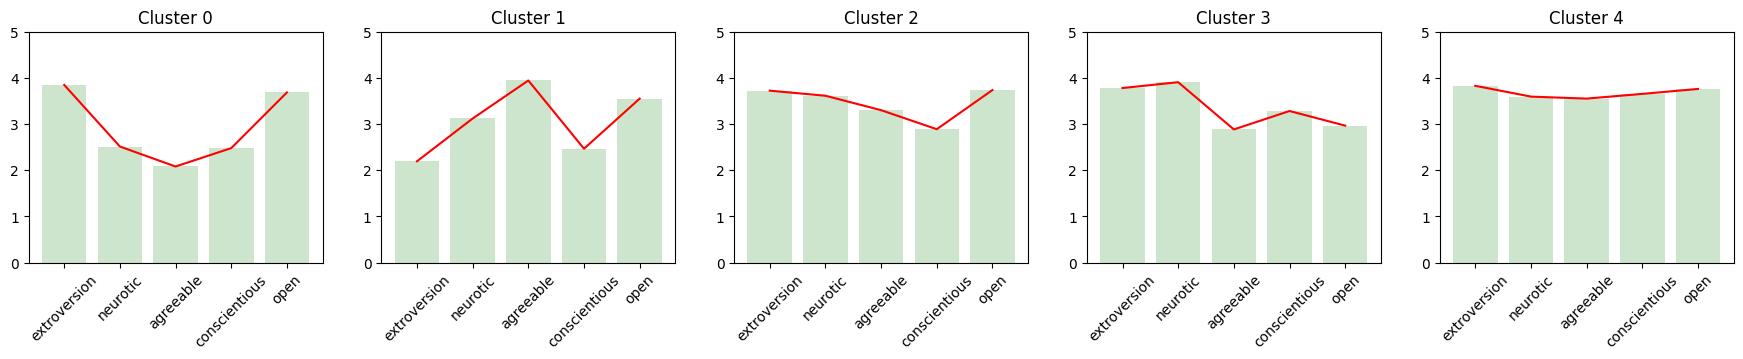

In [68]:
dataclusters = data_sums.groupby("clusters").mean()
plt.figure(figsize=(22, 3))
for i in range(0, 5):
    plt.subplot(1, 5, i + 1)
    plt.bar(
        dataclusters.columns, dataclusters.iloc[:, i], color="green", alpha=0.2
    )
    plt.plot(dataclusters.columns, dataclusters.iloc[:, i], color="red")
    plt.title("Cluster " + str(i))
    plt.xticks(rotation=45)
    plt.ylim(0, 5)

Text(0.5, 1.0, 'Personality Clusters after PCA')

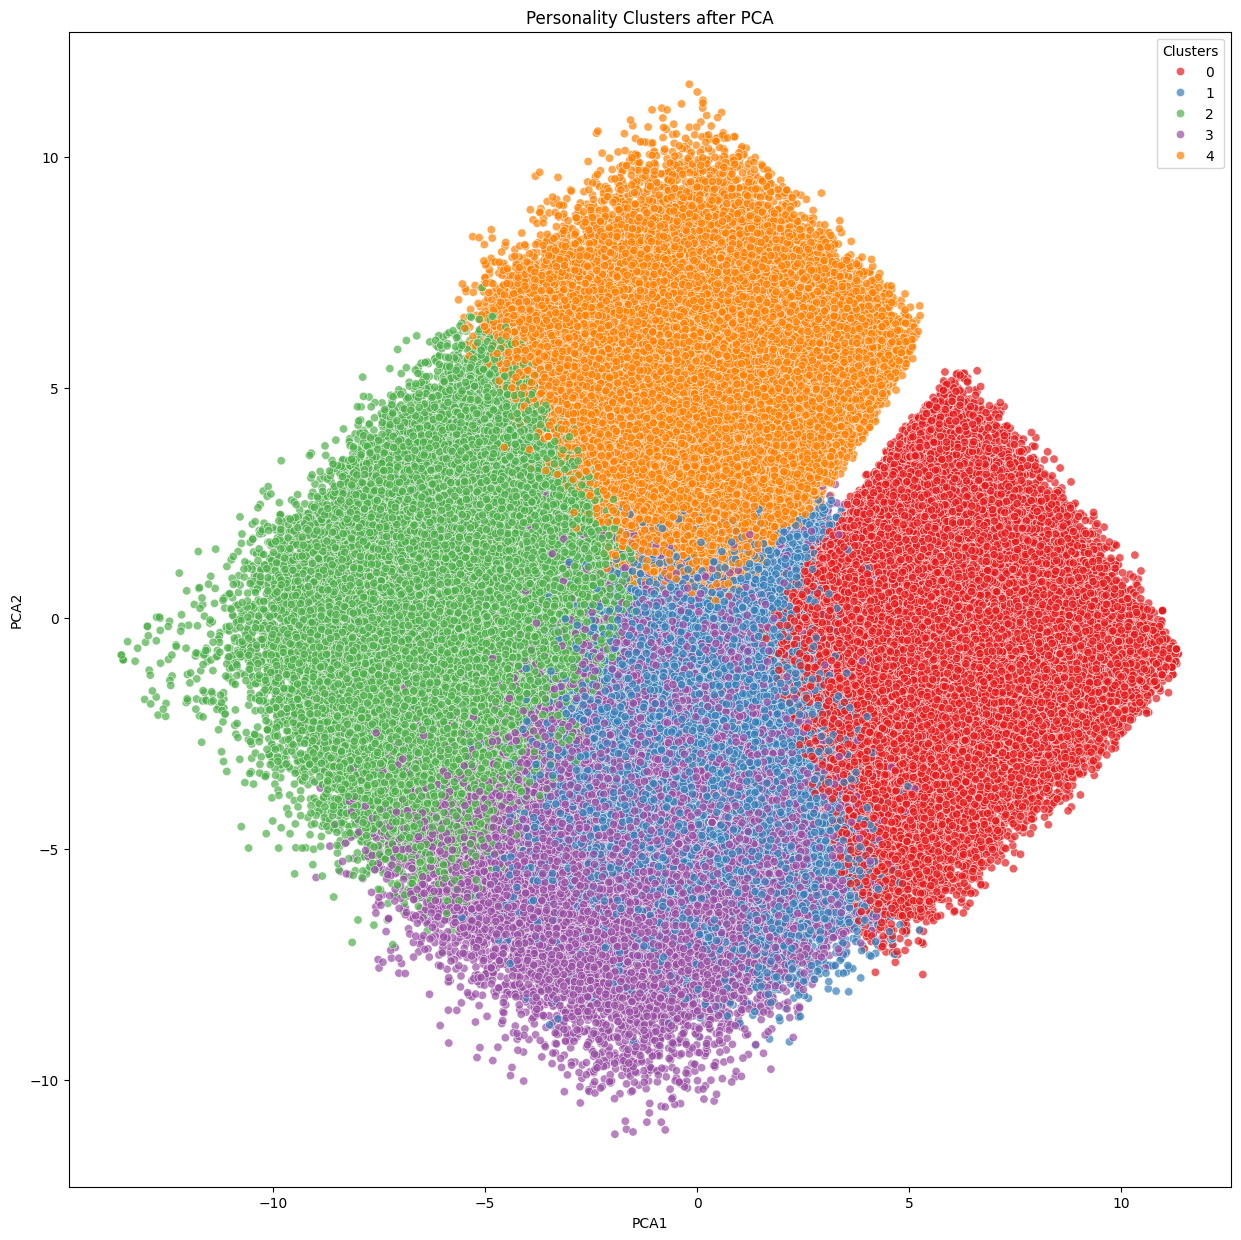

In [69]:
plt.figure(figsize=(15, 15))
sns.scatterplot(
    data=df_pca, x="PCA1", y="PCA2", hue="Clusters", palette="Set1", alpha=0.7
)
plt.title("Personality Clusters after PCA")